In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 

In [2]:
data=pd.read_csv("California_Real_Estate (1).csv",sep=";")
data2=data.copy()
data.head()

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1


In [3]:
data.shape

(267, 8)

In [4]:
#choose only properties that is already sold 
new_no_null_data=data[data["Status"]==1]
new_no_null_data

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
191,1,2005.0,7.0,0,22.0,743,210745,1
192,1,2005.0,7.0,0,28.0,1160,331155,1
193,1,2005.0,7.0,0,34.0,626,204435,1
194,1,2005.0,7.0,0,37.0,756,189194,1


In [5]:
new_no_null_data.isnull().sum()
#null values from unsolded proprities

Building            0
Year of sale        0
Month of sale       0
Type of property    0
Property #          0
Area (ft.)          0
Price               0
Status              0
dtype: int64

In [6]:
data.isnull().sum()

Building             0
Year of sale        72
Month of sale       72
Type of property     0
Property #          60
Area (ft.)           0
Price                0
Status               0
dtype: int64

# Data Standardization 

In [7]:

scaler = StandardScaler()
numerical_columns = new_no_null_data.select_dtypes(include=['float64', 'int']).columns
new_no_null_data[numerical_columns] = scaler.fit_transform(new_no_null_data[numerical_columns])




C:\Users\arwah\AppData\Local\Temp\ipykernel_21180\1430084342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_no_null_data[numerical_columns] = scaler.fit_transform(new_no_null_data[numerical_columns])


In [8]:
pca=PCA()
pca.fit_transform(new_no_null_data)



array([[-0.60734881, -1.31926442,  0.57906783, ...,  0.25542486,
        -0.2337479 ,  0.        ],
       [-0.58105774, -1.34289556,  0.32392824, ...,  0.18273758,
        -0.199292  ,  0.        ],
       [-1.8398805 ,  0.1606641 , -0.29157809, ...,  0.71379278,
        -0.2905317 ,  0.        ],
       ...,
       [-1.03970034, -1.18485044, -0.6530342 , ...,  0.00559872,
        -0.19757116,  0.        ],
       [-0.76196533, -1.19268984, -0.64690188, ...,  0.00744995,
         0.28604396,  0.        ],
       [-0.82936359, -1.09937408, -0.7236547 , ...,  0.01692015,
        -0.20697981,  0.        ]])

In [9]:
pca.explained_variance_ratio_

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

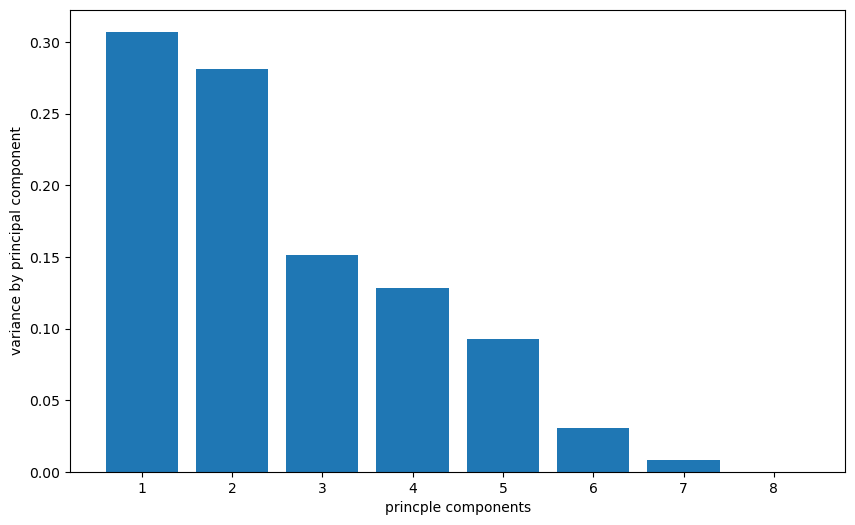

In [10]:
plt.figure(figsize=(10,6))
components=["1","2","3","4","5","6","7","8"]
var=pca.explained_variance_ratio_
plt.bar(components,var)
plt.xlabel("princple components")
plt.ylabel("variance by principal component")
plt.show()

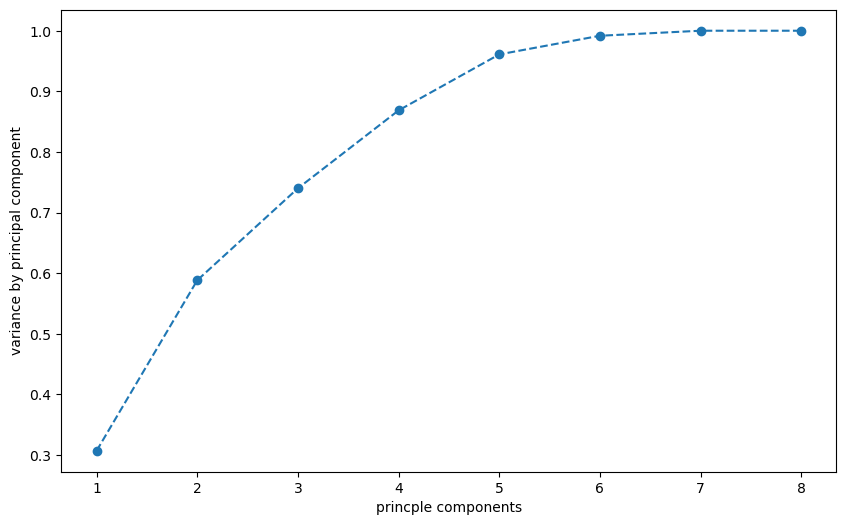

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")

plt.xlabel("princple components")
plt.ylabel("variance by principal component")
plt.show()

# PCA covariance matrix in jupyter _Analysis and interpretation 

In [12]:
pca=PCA(n_components=4)

In [13]:
pca.fit(new_no_null_data)

PCA(n_components=4)

In [14]:
pca.components_

array([[-0.01347829,  0.06534594, -0.06689355, -0.15099905,  0.39492744,
         0.63949973,  0.63509464,  0.        ],
       [ 0.61576753,  0.62980998,  0.02208123, -0.4114363 ,  0.15693164,
        -0.12506318, -0.11888648,  0.        ],
       [ 0.2675697 , -0.06682334,  0.90927776,  0.22605443, -0.12937694,
         0.11386435,  0.1278709 ,  0.        ],
       [-0.26715037, -0.33315704,  0.3274807 , -0.55432795,  0.56219835,
        -0.20000856, -0.21689532, -0.        ]])

In [15]:
pca_data=pd.DataFrame(data=pca.components_,
                      index=["component_1","component_2","component_3","component_4"],
                      columns=new_no_null_data.columns.values)
pca_data

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
component_1,-0.013478,0.065346,-0.066894,-0.150999,0.394927,0.639500,0.635095,0.0
component_2,0.615768,0.629810,0.022081,-0.411436,0.156932,-0.125063,-0.118886,0.0
component_3,0.267570,-0.066823,0.909278,0.226054,-0.129377,0.113864,0.127871,0.0
component_4,-0.267150,-0.333157,0.327481,-0.554328,0.562198,-0.200009,-0.216895,-0.0


<Axes: >

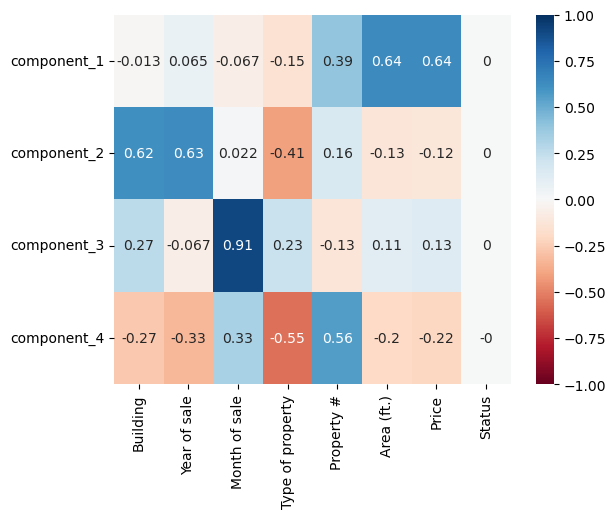

In [16]:
sns.heatmap(pca_data,vmax=1,vmin=-1,cmap='RdBu',annot=True)
